In [1]:
import pandas as pd

file_path = 'D:/IBM_PROJECT/Climate_Actions_AI/data/raw/API_SP.URB.GROW_DS2_en_csv_v2_22433.csv'

# Skip metadata rows and load the actual data
raw_df = pd.read_csv(file_path, skiprows=4)

# Preview the top 5 rows
raw_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,1.158679,1.295975,1.172248,1.045797,0.957043,...,0.952113,0.242460,0.430300,0.582084,-0.221046,-0.432979,0.059249,0.504311,0.742329,NaN
1,Africa Eastern and Southern,AFE,Urban population growth (annual %),SP.URB.GROW,NaN,4.311053,4.416472,4.548403,4.654852,4.711334,...,4.002405,3.998099,4.128901,4.080003,4.063735,4.021604,3.961598,3.872494,3.827974,NaN
2,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,NaN,5.275389,5.351671,5.392848,5.448598,5.497136,...,3.406813,3.723403,3.876433,3.995143,4.204217,3.456606,2.576854,3.319568,4.061727,NaN
3,Africa Western and Central,AFW,Urban population growth (annual %),SP.URB.GROW,NaN,4.683708,4.704948,4.800098,4.857151,4.925364,...,4.056306,3.981127,3.860343,3.743585,3.666633,3.609816,3.556585,3.562604,3.538076,NaN
4,Angola,AGO,Urban population growth (annual %),SP.URB.GROW,NaN,4.747366,4.680638,4.683737,4.693394,4.684179,...,4.678376,4.610486,4.488892,4.394796,4.242388,4.127081,4.059358,3.968288,3.903820,NaN


In [3]:
print(raw_df.shape)

(266, 70)


In [4]:
print(raw_df.columns)


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')


In [5]:
missing_values = raw_df.isnull().sum()
print(missing_values)


Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2021                3
2022                4
2023                3
2024                3
Unnamed: 69       266
Length: 70, dtype: int64


In [6]:
missing_percentage = raw_df.isnull().mean() * 100
print(missing_percentage)


Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1960              100.000000
                     ...    
2021                1.127820
2022                1.503759
2023                1.127820
2024                1.127820
Unnamed: 69       100.000000
Length: 70, dtype: float64


In [7]:
missing = raw_df.isnull().mean() * 100
missing = missing[missing > 0]
print(missing.sort_values(ascending=False))


1960           100.000000
Unnamed: 69    100.000000
1961             1.503759
1962             1.503759
1964             1.503759
                  ...    
2019             1.127820
2021             1.127820
2020             1.127820
2023             1.127820
2024             1.127820
Length: 66, dtype: float64


In [8]:
df = raw_df.drop(columns=['Unnamed: 69'], errors='ignore')  # This avoids error if the column is missing
df = df.drop(columns=['2023', '2024'], errors='ignore')     # Drop future years if present

In [9]:
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                  var_name='Year',
                  value_name='Urban Population Growth (% annual)')

In [10]:
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long = df_long.dropna(subset=['Urban Population Growth (% annual)'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
print(df_long.isnull().mean().round(2))

Country Name                          0.0
Country Code                          0.0
Indicator Name                        0.0
Indicator Code                        0.0
Year                                  0.0
Urban Population Growth (% annual)    0.0
dtype: float64


In [13]:
print(df_long['Urban Population Growth (% annual)'].describe())

count    16275.000000
mean         2.881628
std          2.854497
min       -190.044893
25%          1.208565
50%          2.704554
75%          4.195262
max         52.232834
Name: Urban Population Growth (% annual), dtype: float64


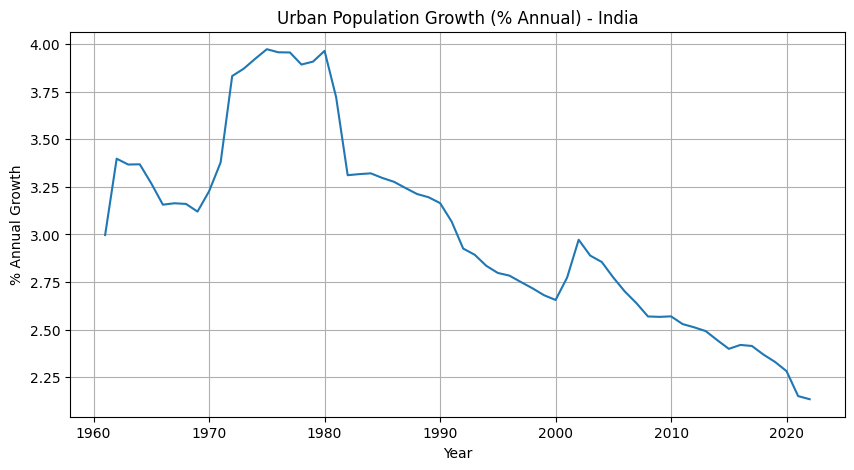

In [14]:
india_data = df_long[df_long['Country Name'] == 'India']

plt.figure(figsize=(10, 5))
sns.lineplot(data=india_data, x='Year', y='Urban Population Growth (% annual)')
plt.title('Urban Population Growth (% Annual) - India')
plt.xlabel('Year')
plt.ylabel('% Annual Growth')
plt.grid(True)
plt.show()

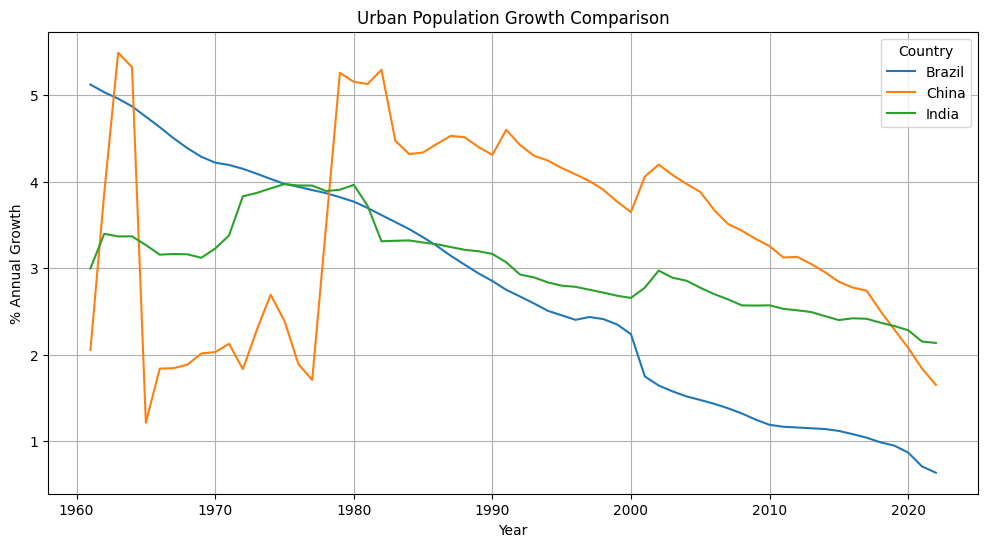

In [15]:
# Compare India, China, Brazil
countries = ['India', 'China', 'Brazil']
subset = df_long[df_long['Country Name'].isin(countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Year', y='Urban Population Growth (% annual)', hue='Country Name')
plt.title('Urban Population Growth Comparison')
plt.xlabel('Year')
plt.ylabel('% Annual Growth')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [18]:
print(df_long.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Year', 'Urban Population Growth (% annual)']


In [19]:
global_avg = df_long.groupby("Year")["Urban Population Growth (% annual)"].mean()

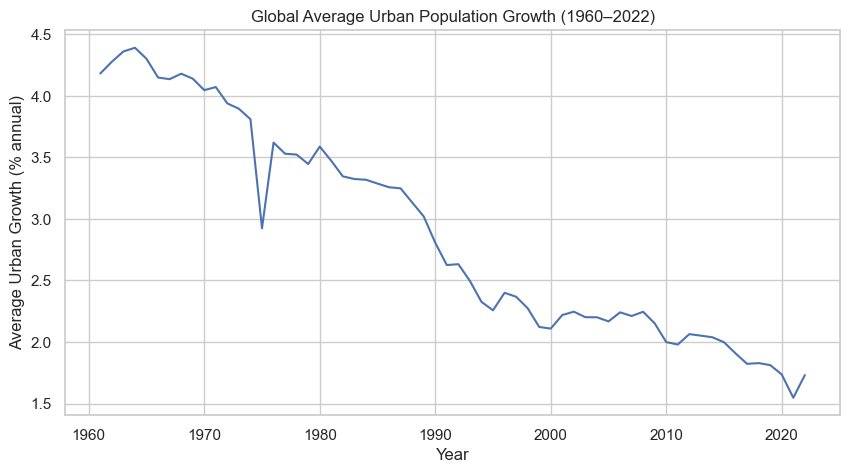

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x=global_avg.index, y=global_avg.values)
plt.title("Global Average Urban Population Growth (1960–2022)")
plt.xlabel("Year")
plt.ylabel("Average Urban Growth (% annual)")
plt.grid(True)
plt.show()


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_51588\1297045682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


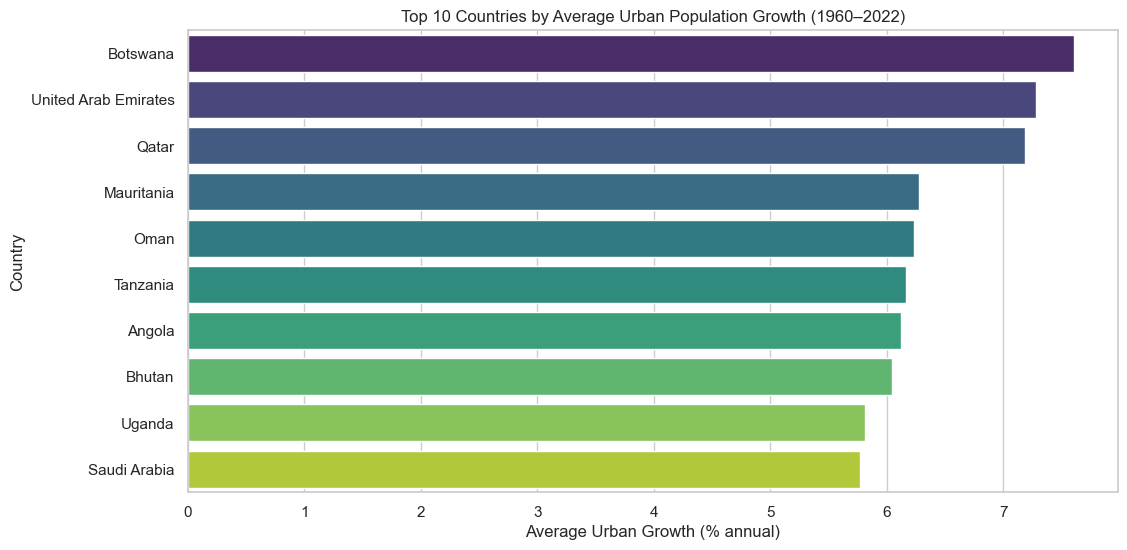

In [21]:
top_countries = df_long.groupby("Country Name")["Urban Population Growth (% annual)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Average Urban Population Growth (1960–2022)")
plt.xlabel("Average Urban Growth (% annual)")
plt.ylabel("Country")
plt.grid(True, axis='x')
plt.show()

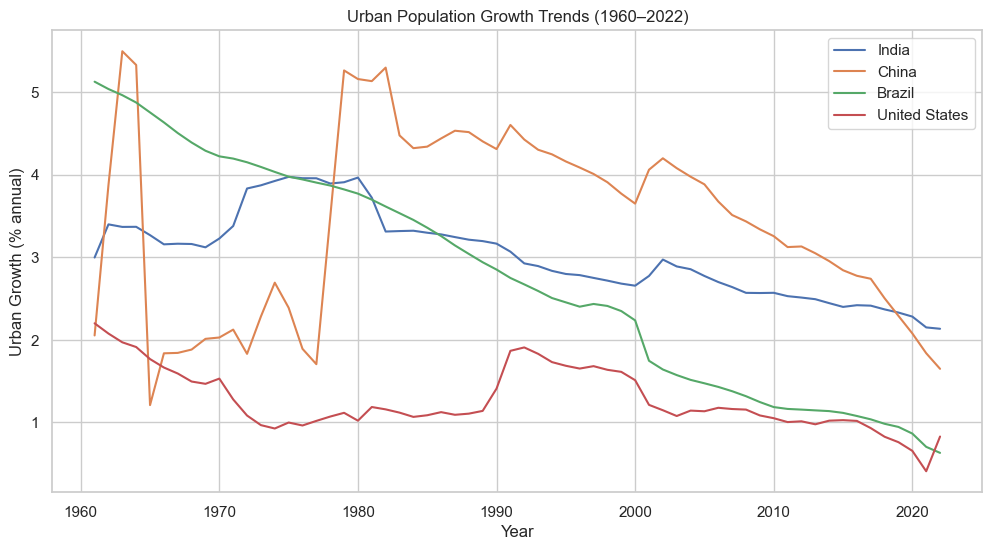

In [22]:
countries = ['India', 'China', 'Brazil', 'United States']

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_long[df_long['Country Name'] == country]
    sns.lineplot(x='Year', y='Urban Population Growth (% annual)', data=country_data, label=country)

plt.title("Urban Population Growth Trends (1960–2022)")
plt.xlabel("Year")
plt.ylabel("Urban Growth (% annual)")
plt.legend()
plt.grid(True)
plt.show()

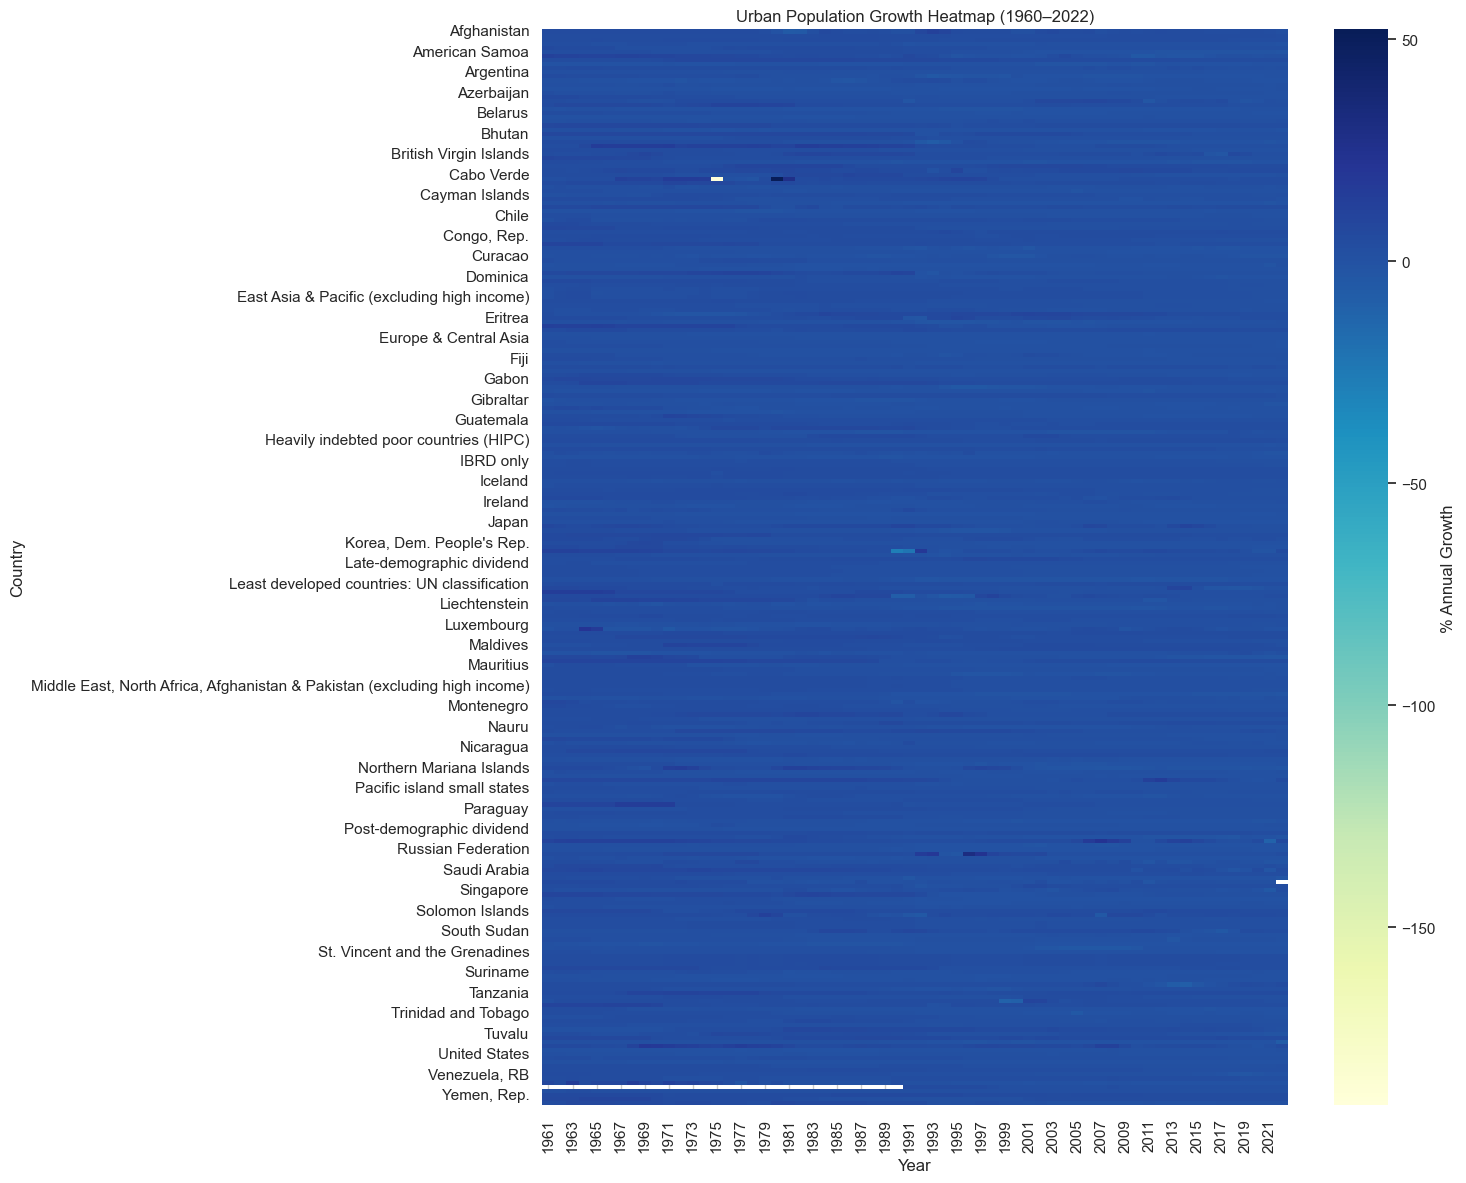

In [23]:
heatmap_data = df_long.pivot(index='Country Name', columns='Year', values='Urban Population Growth (% annual)')

plt.figure(figsize=(15, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': '% Annual Growth'})
plt.title("Urban Population Growth Heatmap (1960–2022)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



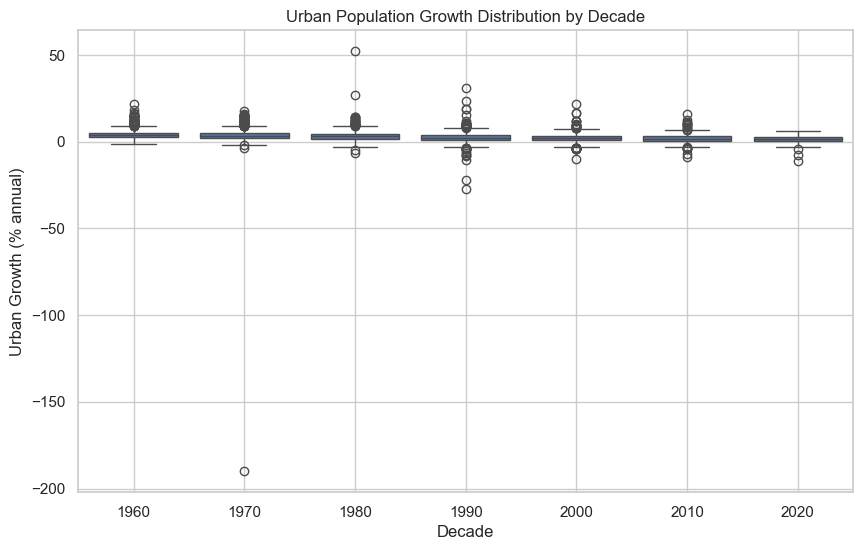

In [24]:
df_long['Decade'] = (df_long['Year'] // 10) * 10

plt.figure(figsize=(10,6))
sns.boxplot(x='Decade', y='Urban Population Growth (% annual)', data=df_long)
plt.title("Urban Population Growth Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel("Urban Growth (% annual)")
plt.grid(True)
plt.show()


In [25]:
duplicates = df_long.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [26]:
print(df_long['Country Name'].nunique())   # number of countries
print(df_long['Year'].nunique())           # number of years


263
62


In [27]:
df_long['Year'] = df_long['Year'].astype(int)


In [28]:
df_long.rename(columns={'Urban Population Growth (% annual)': 'Urban_Growth'}, inplace=True)


In [29]:
# Example: recent 20 years
df_recent = df_long[df_long['Year'] >= 2000]

# Example: India only
df_india = df_long[df_long['Country Name'] == 'India']


In [30]:
df_long.to_csv("cleaned_urban_growth.csv", index=False)
